In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('Set1')
sns.set()
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

In [84]:
destination = pd.read_csv('Dataset/destination.csv', sep=',', error_bad_lines=False, encoding="latin-1")
destination_rating = pd.read_csv('Dataset/user_destination_rating.csv', sep=',', error_bad_lines=False, encoding="latin-1")
user = pd.read_csv('Dataset/user.csv', sep=',', error_bad_lines=False, encoding="latin-1")
destination

,Place_Id,Place_Name,Description,Category,City,Price,Ratings,Time_Minutes,Coordinate,Lat,Long,Gambar,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,https://ksmtour.com/media/images/articles4/mon...,NaN
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,2500,4.6,90,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,https://id.wikipedia.org/wiki/Kota_Tua_Jakarta...,NaN
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,https://tikatheexplorer.files.wordpress.com/20...,NaN
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,240,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,https://cdn-2.tstatic.net/tribunnews/foto/bank...,NaN
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,https://s2.bukalapak.com/img/7147940573/large/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,511,Kawi Lounge,"Selain menyediakan makanan yang lezat, bagi an...",Kuliner,Surabaya,75000,4.9,60,"{'lat': -7.262349353954714, 'lng': 112.738222...",-7.262349,112.738223,https://media-cdn.tripadvisor.com/media/photo-...,NaN
511,512,Citrus Lee,Citrus Lee memiliki banyak pilihan menu mulai ...,Kuliner,Surabaya,500000,4.5,90,"{'lat': -7.290699592478199, 'lng': 112.7348877...",-7.290700,112.734888,https://3.bp.blogspot.com/-WV2lmuSUqQc/VSgRPV0...,NaN
512,513,Citilites Skyclub and Bistro,Ikon Java Paragon Hotel and Residences yang te...,Kuliner,Surabaya,75000,4.5,90,"{'lat': -7.292128573257002, 'lng': 112.715379...",-7.292129,112.715380,https://media-cdn.tripadvisor.com/media/photo-...,NaN
513,514,Historica,"empatnya tidak begitu luas, tetapi penataan te...",Kuliner,Surabaya,75000,4.4,90,"{'lat': -7.269359566945745, 'lng': 112.7492500...",-7.269360,112.749250,https://media-cdn.tripadvisor.com/media/photo-...,NaN


In [85]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      515 non-null    int64  
 1   Place_Name    515 non-null    object 
 2   Description   515 non-null    object 
 3   Category      515 non-null    object 
 4   City          515 non-null    object 
 5   Price         515 non-null    int64  
 6   Ratings       515 non-null    object 
 7   Time_Minutes  515 non-null    int64  
 8   Coordinate    515 non-null    object 
 9   Lat           515 non-null    float64
 10  Long          515 non-null    float64
 11  Gambar        515 non-null    object 
 12  Unnamed: 12   3 non-null      object 
dtypes: float64(2), int64(3), object(8)
memory usage: 52.4+ KB


In [86]:
destination.drop(['Unnamed: 12'], axis=1, inplace=True)
destination

,Place_Id,Place_Name,Description,Category,City,Price,Ratings,Time_Minutes,Coordinate,Lat,Long,Gambar
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,https://ksmtour.com/media/images/articles4/mon...
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,2500,4.6,90,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,https://id.wikipedia.org/wiki/Kota_Tua_Jakarta...
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,https://tikatheexplorer.files.wordpress.com/20...
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,240,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,https://cdn-2.tstatic.net/tribunnews/foto/bank...
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,https://s2.bukalapak.com/img/7147940573/large/...
...,...,...,...,...,...,...,...,...,...,...,...,...
510,511,Kawi Lounge,"Selain menyediakan makanan yang lezat, bagi an...",Kuliner,Surabaya,75000,4.9,60,"{'lat': -7.262349353954714, 'lng': 112.738222...",-7.262349,112.738223,https://media-cdn.tripadvisor.com/media/photo-...
511,512,Citrus Lee,Citrus Lee memiliki banyak pilihan menu mulai ...,Kuliner,Surabaya,500000,4.5,90,"{'lat': -7.290699592478199, 'lng': 112.7348877...",-7.290700,112.734888,https://3.bp.blogspot.com/-WV2lmuSUqQc/VSgRPV0...
512,513,Citilites Skyclub and Bistro,Ikon Java Paragon Hotel and Residences yang te...,Kuliner,Surabaya,75000,4.5,90,"{'lat': -7.292128573257002, 'lng': 112.715379...",-7.292129,112.715380,https://media-cdn.tripadvisor.com/media/photo-...
513,514,Historica,"empatnya tidak begitu luas, tetapi penataan te...",Kuliner,Surabaya,75000,4.4,90,"{'lat': -7.269359566945745, 'lng': 112.7492500...",-7.269360,112.749250,https://media-cdn.tripadvisor.com/media/photo-...


In [87]:
destination_rating.head()

,User_Id,Place_Id,Ratings
0,1,482,3
1,1,211,1
2,1,219,4
3,1,319,4
4,1,148,2


In [88]:
destination_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   User_Id   15000 non-null  int64
 1   Place_Id  15000 non-null  int64
 2   Ratings   15000 non-null  int64
dtypes: int64(3)
memory usage: 351.7 KB


In [89]:
destination_rating_merge = pd.merge(destination_rating, destination, on='Place_Id')
destination_rating_merge

,User_Id,Place_Id,Ratings_x,Place_Name,Description,Category,City,Price,Ratings_y,Time_Minutes,Coordinate,Lat,Long,Gambar
0,1,482,3,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
1,3,482,1,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
2,10,482,1,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
3,41,482,1,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
4,64,482,2,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,245,145,5,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...
14996,245,145,2,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...
14997,248,145,5,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...
14998,251,145,5,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...


In [90]:
cols = ['Category', 'Price', 'City', 'Ratings_y', 'Time_Minutes', 'Unnamed: 12']
destination_rating_merge.rename(columns = {'Ratings_x':'Place_Rating', 'User': 'User_Id'}, inplace = True)
destination_rating_merge

,User_Id,Place_Id,Place_Rating,Place_Name,Description,Category,City,Price,Ratings_y,Time_Minutes,Coordinate,Lat,Long,Gambar
0,1,482,3,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
1,3,482,1,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
2,10,482,1,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
3,41,482,1,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
4,64,482,2,Oseng-oseng Mercon Bu Narti,Oseng Mercon Bu Narti merupakan pelopor dari o...,Kuliner,Yogyakarta,30000,"3,9",45,"{'lat': -7.801057, 'lng': 110.357729}",-7.801163,110.358063,https://assets.grab.com/wp-content/uploads/sit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,245,145,5,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...
14996,245,145,2,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...
14997,248,145,5,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...
14998,251,145,5,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,https://jadwaltravel.com/wp-content/uploads/20...


In [91]:
destination_rating_count = (
    destination_rating_merge.
    groupby(by = ['Place_Name'])['Place_Rating'].
    count().
    reset_index().
    rename(columns = {'Place_Rating': 'Destination_Rating_Count'})
    [['Place_Name', 'Destination_Rating_Count']]
)

In [92]:
threshold = 25
destination_rating_count = destination_rating_count.query('Destination_Rating_Count >= @threshold')

user_rating = pd.merge(destination_rating_count, destination_rating_merge, left_on='Place_Name', right_on='Place_Name', how='left')

In [93]:
user_rating

,Place_Name,Destination_Rating_Count,User_Id,Place_Id,Place_Rating,Description,Category,City,Price,Ratings_y,Time_Minutes,Coordinate,Lat,Long,Gambar
0,Air Mancur Menari,27,4,394,2,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,https://gotripina.com/wp-content/uploads/2020/...
1,Air Mancur Menari,27,12,394,3,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,https://gotripina.com/wp-content/uploads/2020/...
2,Air Mancur Menari,27,17,394,2,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,https://gotripina.com/wp-content/uploads/2020/...
3,Air Mancur Menari,27,29,394,2,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,https://gotripina.com/wp-content/uploads/2020/...
4,Air Mancur Menari,27,38,394,2,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,https://gotripina.com/wp-content/uploads/2020/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848,de Soematra,34,259,505,5,De Soematra adalah salah satu restoran kelas a...,Kuliner,Surabaya,200000,4.7,90,"{'lat': -7.263181, 'lng': 112.747611}",-7.271525,112.747611,https://media-cdn.tripadvisor.com/media/photo-...
12849,de Soematra,34,263,505,1,De Soematra adalah salah satu restoran kelas a...,Kuliner,Surabaya,200000,4.7,90,"{'lat': -7.263181, 'lng': 112.747611}",-7.271525,112.747611,https://media-cdn.tripadvisor.com/media/photo-...
12850,de Soematra,34,265,505,3,De Soematra adalah salah satu restoran kelas a...,Kuliner,Surabaya,200000,4.7,90,"{'lat': -7.263181, 'lng': 112.747611}",-7.271525,112.747611,https://media-cdn.tripadvisor.com/media/photo-...
12851,de Soematra,34,280,505,1,De Soematra adalah salah satu restoran kelas a...,Kuliner,Surabaya,200000,4.7,90,"{'lat': -7.263181, 'lng': 112.747611}",-7.271525,112.747611,https://media-cdn.tripadvisor.com/media/photo-...


In [94]:
top_10 = user_rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, destination[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')
top_10.drop(['Place_Id_y', 'index'], axis=1, inplace=True)
top_10.rename(columns = {'Place_Id_x':'Place_Rating'}, inplace = True)
top_10

,Place_Rating,Place_Name
0,49,Arumanis Restaurant
1,44,Kebun Teh Nglinggo
2,42,Kampoeng Djadhoel Semarang
3,42,Wisata Lereng Kelir
4,41,Ocean Ecopark
5,41,Historica
6,41,Pesta Keboen Restoran
7,41,Gunung Lalakon
8,41,Monumen Kapal Selam
9,41,Pantai Greweng


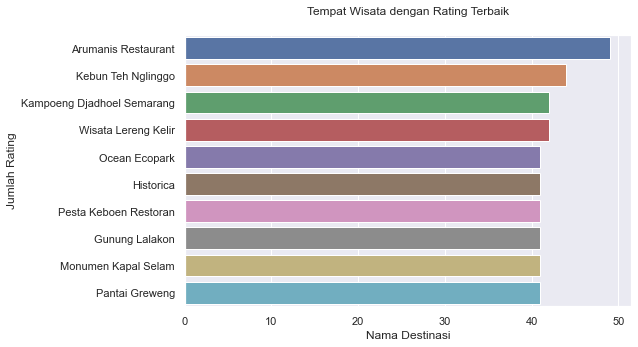

In [95]:
plt.figure(figsize=(8,5))
sns.barplot('Place_Rating', 'Place_Name', data=top_10)
plt.title('Tempat Wisata dengan Rating Terbaik', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Destinasi')
plt.show()

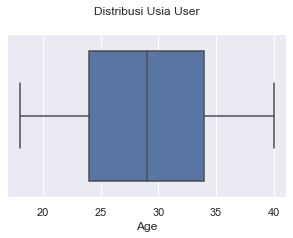

In [96]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

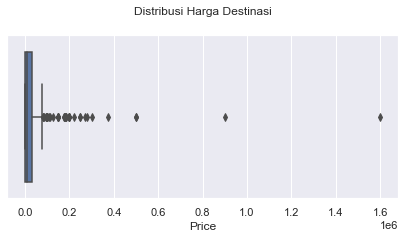

In [97]:
plt.figure(figsize=(7,3))
sns.boxplot(destination['Price'])
plt.title('Distribusi Harga Destinasi', pad=20)
plt.show()

In [98]:
destination_rating.shape

(15000, 3)

In [99]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(destination_rating, test_size=0.2, random_state=42)

In [100]:
train.head()

,User_Id,Place_Id,Ratings
9839,198,363,3
9680,195,210,4
7093,142,63,4
11293,227,129,4
820,17,151,2


In [101]:
test.head()

,User_Id,Place_Id,Ratings
11499,231,511,5
6475,130,109,3
13167,265,380,1
862,18,511,4
5970,119,452,5


In [102]:
n_users = len(destination_rating.User_Id.unique())
n_users

300

In [103]:
n_tourisms = len(destination_rating.Place_Id.unique())
n_tourisms

515

In [104]:
# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model = Model([user_input, tourism_input], out)
model.compile('adam', 'mean_squared_error')

In [105]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tourism-Input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Tourism-Embedding (Embedding)   (None, 1, 5)         2580        Tourism-Input[0][0]              
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         1505        User-Input[0][0]                 
____________________________________________________________________________________________

In [106]:
history = model.fit([train.User_Id, train.Place_Id], train.Ratings, epochs=20, verbose=1)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 2.6571
Epoch 2/20
375/375 [==============================] - 0s 893us/step - loss: 1.9792
Epoch 3/20
375/375 [==============================] - 0s 973us/step - loss: 1.9416
Epoch 4/20
375/375 [==============================] - 0s 935us/step - loss: 1.9305
Epoch 5/20
375/375 [==============================] - 0s 868us/step - loss: 1.9185
Epoch 6/20
375/375 [==============================] - 0s 922us/step - loss: 1.9091
Epoch 7/20
375/375 [==============================] - 0s 898us/step - loss: 1.9024
Epoch 8/20
375/375 [==============================] - 0s 914us/step - loss: 1.8969
Epoch 9/20
375/375 [==============================] - 0s 963us/step - loss: 1.8690
Epoch 10/20
375/375 [==============================] - 0s 832us/step - loss: 1.7992
Epoch 11/20
375/375 [==============================] - 0s 853us/step - loss: 1.7418
Epoch 12/20
375/375 [==============================] - 0s 834us/step - loss: 1.6864
Epo

Text(0, 0.5, 'Training Error')

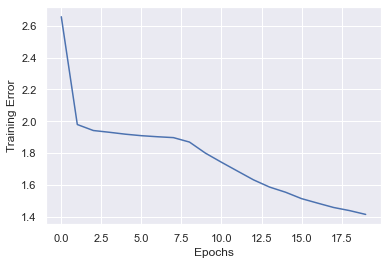

In [107]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [108]:
model.evaluate([test.User_Id, test.Place_Id], test.Ratings)

94/94 [==============================] - 0s 753us/step - loss: 2.5467


2.5467121601104736

In [109]:
model.save('model_recomendation_rating.h5')